In [45]:
from PIL import Image
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


import os
import time
from PIL import Image
from IPython.display import clear_output
import numpy    as np
import pandas   as pd
import seaborn  as sb
import matplotlib.pyplot as plt
import sklearn  as skl

from sklearn.tree          import DecisionTreeClassifier
from sklearn.ensemble      import RandomForestClassifier
from sklearn.ensemble      import ExtraTreesClassifier
from sklearn.ensemble      import AdaBoostClassifier
from sklearn.ensemble      import GradientBoostingClassifier
from sklearn.experimental  import enable_hist_gradient_boosting # Necesary for HistGradientBoostingClassifier
from sklearn.ensemble      import HistGradientBoostingClassifier
from xgboost               import XGBClassifier
from lightgbm              import LGBMClassifier
from catboost              import CatBoostClassifier
from tqdm import tqdm


READING IMAGES


In [2]:
image = Image.open('./dataset2/cloudy1.jpg')
image2 = Image.open('./dataset2/rain1.jpg')

DISPLAYING IMAGES

(600, 400)
JPEG
RGB


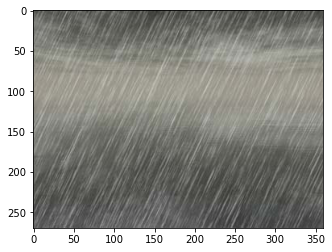

In [3]:
image.show()
plt.imshow(image)
plt.imshow(image2)

print(image.size) #width ,height
print(image.format)
print(image.mode)

Saving Images/ Copying Images

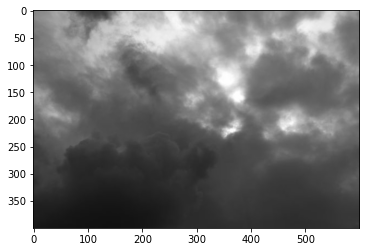

In [21]:
image.save('newimage.jpg')

copied_image = image.copy()

plt.imshow(copied_image)

CROPPING

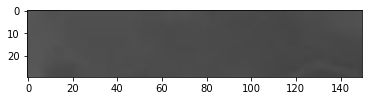

In [24]:
left = 100
top = 200
right = 250
bottom = 230
crop_image = image.crop((left, top, right, bottom))
plt.imshow(crop_image)

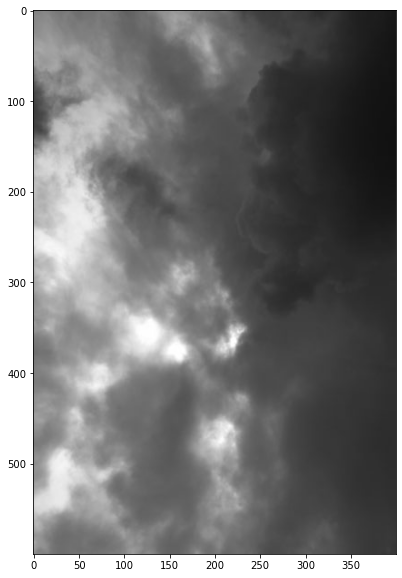

In [30]:
transpose_image = image.transpose(Image.TRANSPOSE)
plt.figure(figsize=(10,10))
plt.imshow(transpose_image)

CONVERT  TO NUMPY IMAGE

In [31]:
numpy_array = np.array(image)
print(numpy_array.shape)

(400, 600, 3)


REVRESE FROM NP ARRAY TO IMG

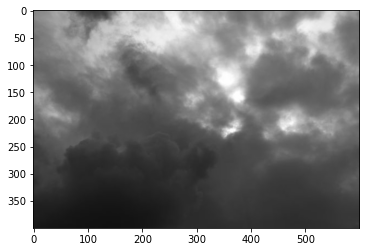

In [33]:
numpy_image = Image.fromarray(numpy_array)
plt.imshow(numpy_array)

FLIPPING CHANNELS

(259, 194)
(259, 194)


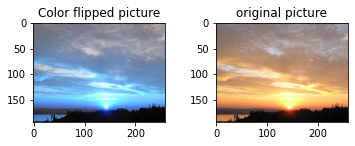

In [6]:
image3 = Image.open('./dataset2/sunrise133.jpg')
image_channels = image3.copy()
r,g,b = image_channels.split()
im = Image.merge("RGB", (b,g,r))
plt.subplot(2,2,1)
plt.title('Color flipped picture')
plt.imshow(im)
#print(im.mode)

plt.subplot(2,2,2)
plt.title('original picture')
plt.imshow(image3)

print(image3.size)
print(im.size)


GETTING IMAGES TO NUMBERS AND PD DATAFRAME

In [22]:
path = 'dataset2'
cloudy = []
rainy = []
sunrise = []
shiny = []

for file in os.listdir(path):
    if file.startswith('c'):
        cloudy.append(file)
    elif file.startswith('r'):
        rainy.append(file)
    elif file.startswith('sh'):
        shiny.append(file)
    else: 
    
        file.startswith('sun')
        sunrise.append(file)

        
        

In [127]:
print(len(cloudy))
print(len(rainy))
print(len(sunrise))
print(len(shiny))




300
215
357
253


In [56]:
x = []
y = []

for cloud in cloudy:
    img =Image.open(path + '/' + cloud)
    img_array1 = np.array(img, dtype =int)
    img_flat_1 = img_array1.flatten()
    x.append(img_flat_1)
    y.append(0)
    
for rain in rainy:
    img =Image.open(path + '/' + rain)
    img_array2 = np.array(img, dtype =int)
    img_flat_2 = img_array2.flatten()
    x.append(img_flat_2)
    y.append(1)

for sun in sunrise:
    img =Image.open(path + '/' + sun)
    img_array3 = np.array(img, dtype =int)
    img_flat_3 = img_array3.flatten()
    x.append(img_flat_3)
    y.append(2)
    
for shine in shiny:
    img =Image.open(path + '/' + shine)
    img_array4 = np.array(img, dtype =int)
    img_flat_4 = img_array4.flatten()
    x.append(img_flat_4)
    y.append(3)            

In [58]:
print(img_flat_1.shape)
print(img_flat_2.shape)
print(img_flat_3.shape)
print(img_flat_4.shape)



(150738,)
(150975,)
(151122,)
(151119,)


In [63]:
pd.Series(y).value_counts()
x

[array([125, 125, 125, ...,  55,  55,  55]),
 array([177, 192, 223, ..., 113, 143, 169]),
 array([135, 135, 143, ...,  92,  78,  41]),
 array([212, 209, 216, ...,  20,  15,   9]),
 array([ 79,  93, 122, ...,  77,  89, 101]),
 array([ 65,  79, 105, ...,  90, 101, 121]),
 array([ 99, 137, 173, ...,   5,   4,   2]),
 array([ 83,  85,  97, ..., 168, 146, 109]),
 array([ 97, 107, 143, ...,  11,  11,  19]),
 array([ 53,  78, 118, ...,  35,  63, 102]),
 array([205, 209, 234, ...,  16,  13,  32]),
 array([152, 184, 207, ..., 173, 184, 190]),
 array([186, 185, 191, ...,  99, 123,  45]),
 array([ 21,  65, 110, ..., 202, 212, 221]),
 array([  2,  48, 144, ...,  18,  81, 178]),
 array([ 26, 124, 185, ..., 178, 184, 206]),
 array([ 20,  76, 169, ...,  65, 125, 177]),
 array([ 19,  85, 163, ...,  87, 129, 154]),
 array([ 9,  0,  8, ..., 29, 18, 24]),
 array([ 95, 107, 129, ...,  72,  96, 120]),
 array([ 51,  92, 114, ..., 163, 191, 213]),
 array([14, 58, 83, ..., 27, 52, 72]),
 array([30, 59, 89, ..

In [60]:
tree_classifiers = {
  "Decision Tree": DecisionTreeClassifier(),
  "Extra Trees":   ExtraTreesClassifier(n_estimators=100),
  "Random Forest": RandomForestClassifier(n_estimators=100),
  "AdaBoost":      AdaBoostClassifier(n_estimators=100),
  "Skl GBM":       GradientBoostingClassifier(n_estimators=100),
  "Skl HistGBM":   HistGradientBoostingClassifier(max_iter=100),
  "XGBoost":       XGBClassifier(n_estimators=100),
  "LightGBM":      LGBMClassifier(n_estimators=100),
  "CatBoost":      CatBoostClassifier(n_estimators=100),
}



In [43]:
from sklearn.model_selection import train_test_split 

In [61]:


x_train, x_val, y_train, y_val = train_test_split(
    x, y,
    test_size=0.2,
    stratify = y,   # ALWAYS RECOMMENDED FOR BETTER VALIDATION
    random_state=4  # Recommended for reproducibility
)


results = pd.DataFrame({'Model': [], 'Accuracy': [], 'Bal Acc.': [], 'Time': []})


for model_name, model in tree_classifiers.items():
    
    start_time = time.time()
    model.fit(x_train, y_train)
    total_time = time.time() - start_time
        
    pred = model.predict(x_val)
    
    results = results.append({"Model":    model_name,
                              "Accuracy": metrics.accuracy_score(y_val, pred)*100,
                              "Bal Acc.": metrics.balanced_accuracy_score(y_val, pred)*100,
                              "Time":     total_time},
                              ignore_index=True)
### END SOLUTION


results_ord = results.sort_values(by=['Accuracy'], ascending=False, ignore_index=True)
results_ord.index += 1 
print(results_ord)


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (900,) + inhomogeneous part.